In [109]:
import pandas as pd
df = pd.read_csv('JAllen_Regular_Passing.csv')
df = df.dropna()

print(df.head())

   Rk  Year       Date   Age   Cmp   Att  Cmp%    Yds   TD  Int   Rate   Sk  \
0   1  2018   9/9/2018 22.11  6.00 15.00 40.00  74.00 0.00 0.00  56.00 3.00   
1   2  2018  9/16/2018 22.12 18.00 33.00 54.55 245.00 1.00 2.00  63.30 5.00   
2   3  2018  9/23/2018 22.12 15.00 22.00 68.18 196.00 1.00 0.00 111.20 3.00   
3   4  2018  9/30/2018 22.13 16.00 33.00 48.48 151.00 0.00 2.00  36.30 7.00   
4   5  2018  10/7/2018 22.14 10.00 19.00 52.63  82.00 0.00 1.00  42.00 1.00   

   Y/A  AY/A  
0 4.93  4.93  
1 7.42  5.30  
2 8.91  9.82  
3 4.58  1.85  
4 4.32  1.95  


In [110]:
nummerical_cols = ['Age', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'Int', 'Rate', 'Sk', 'Y/A']
features = df[nummerical_cols]

pd.set_option('display.float_format', '{:,.2f}'.format)
print(features.describe(percentiles=[0.25,.5,.75]))

        Age   Cmp   Att  Cmp%    Yds    TD   Int   Rate    Sk   Y/A
count 94.00 94.00 94.00 94.00  94.00 94.00 94.00  94.00 94.00 94.00
mean  24.81 21.16 33.46 62.62 241.52  1.78  0.83  91.24  1.86  7.26
std    1.67  7.36  9.54 10.40  82.43  1.18  0.85  27.74  1.61  2.10
min   22.11  3.00  5.00 40.00   5.00  0.00  0.00  17.00  0.00  1.00
25%   23.19 16.00 26.00 54.55 187.75  1.00  0.00  72.50  1.00  5.73
50%   25.13 20.00 33.00 63.37 238.50  2.00  1.00  89.55  1.00  6.82
75%   26.18 26.75 40.00 69.59 306.25  2.00  1.00 111.00  3.00  8.43
max   27.23 42.00 63.00 84.00 424.00  4.00  3.00 158.30  7.00 13.68


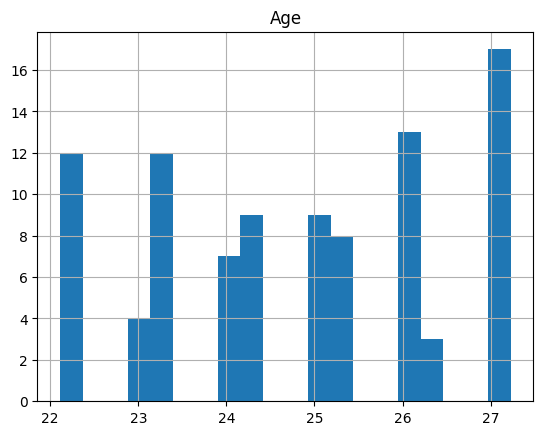

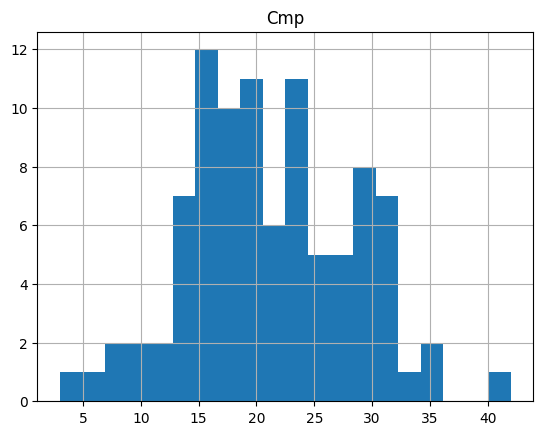

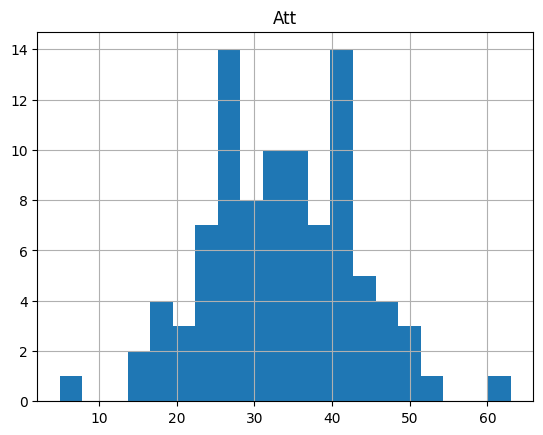

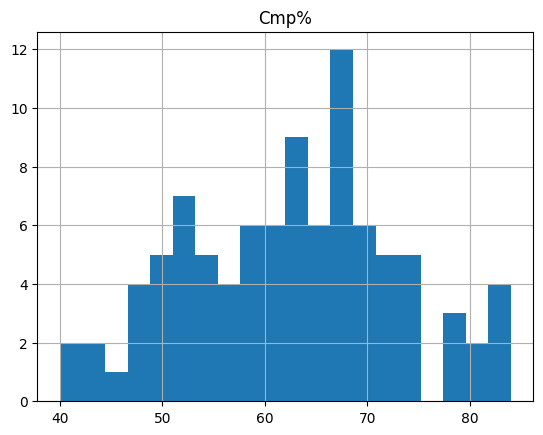

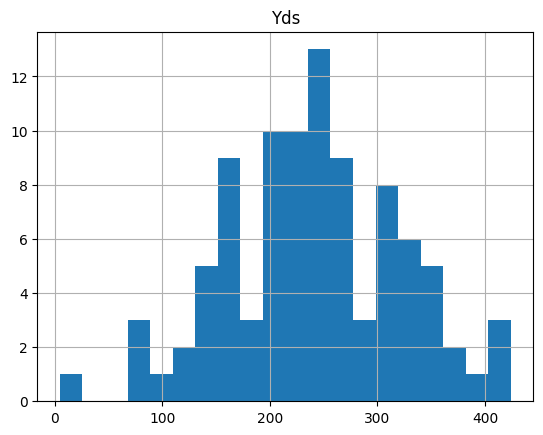

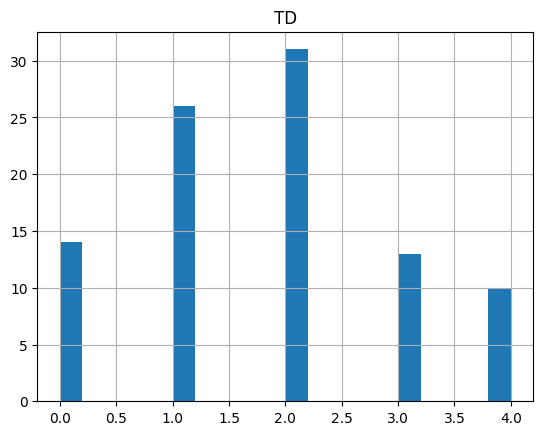

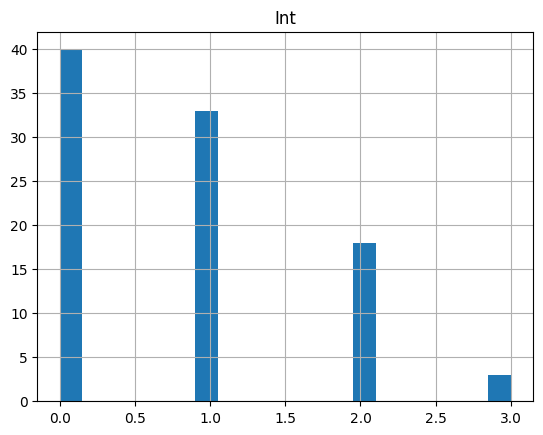

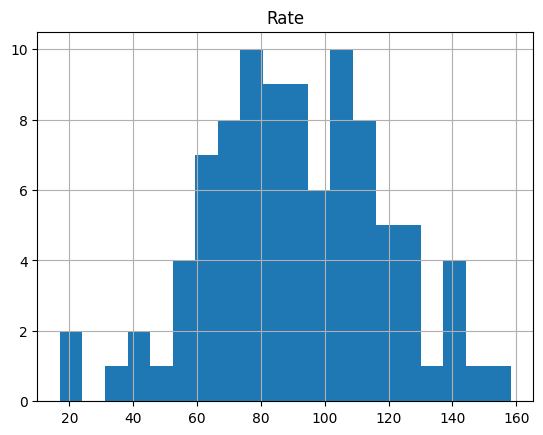

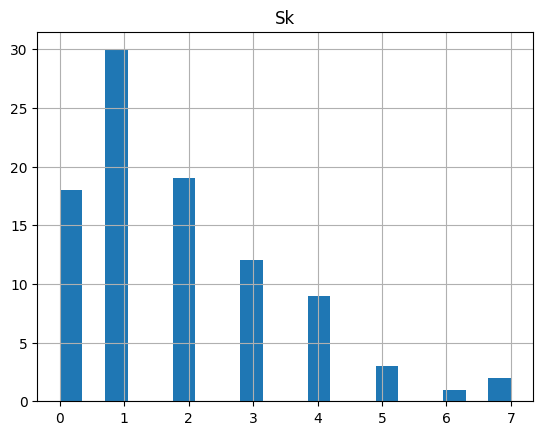

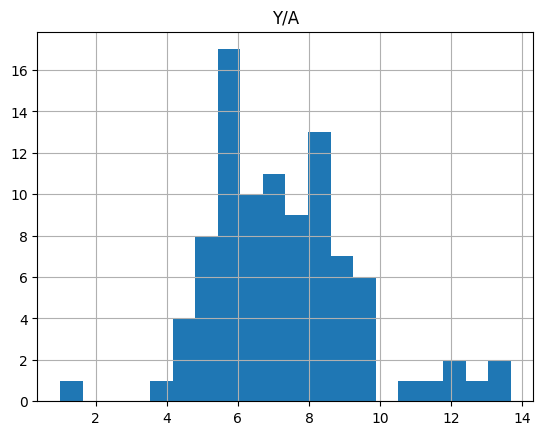

In [111]:
import matplotlib.pyplot as plt

for feature in features:
    features[feature].hist(bins=20)
    plt.title(feature)
    plt.show()

Shape of Features: (94, 9)
Shape of Target: (94,)


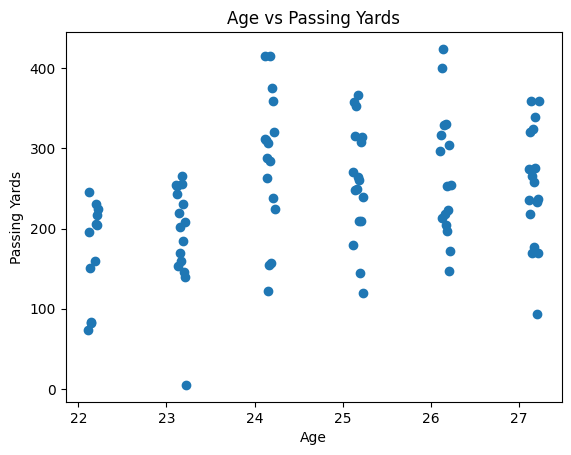

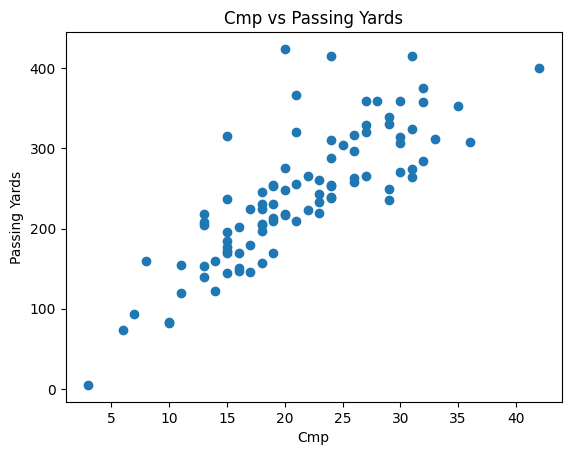

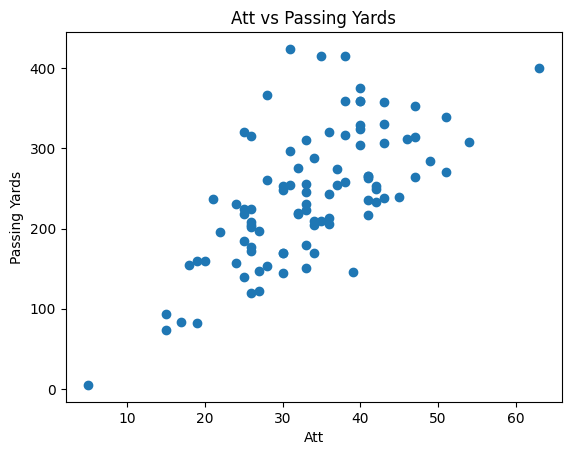

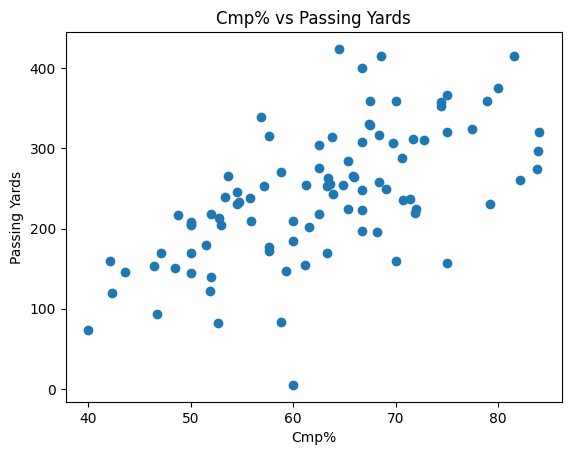

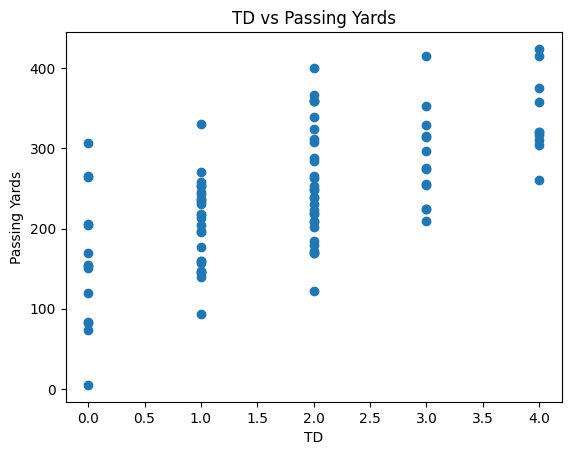

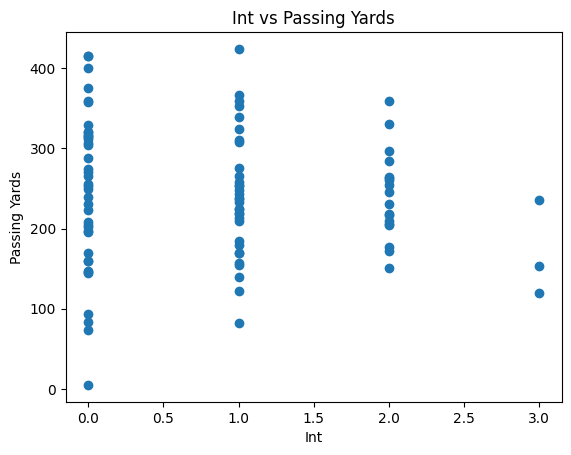

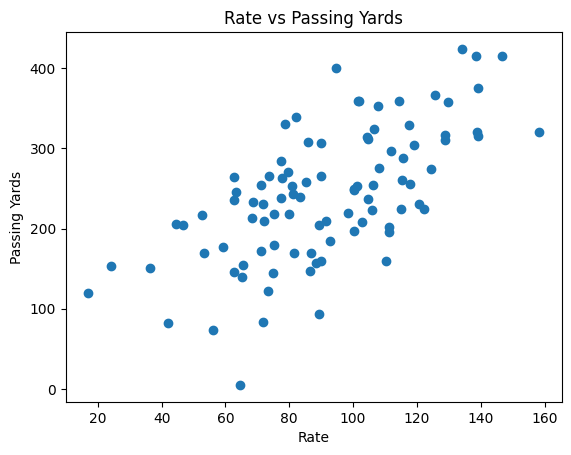

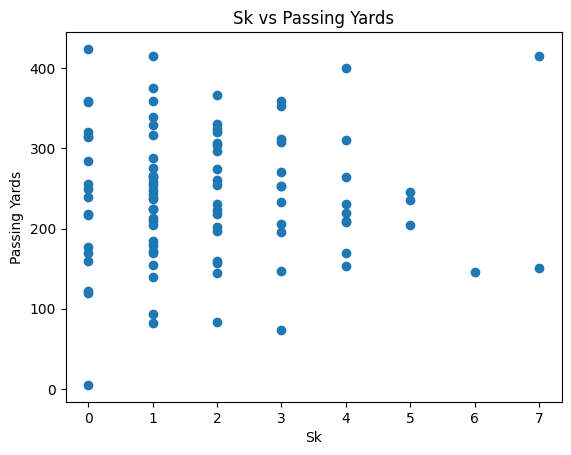

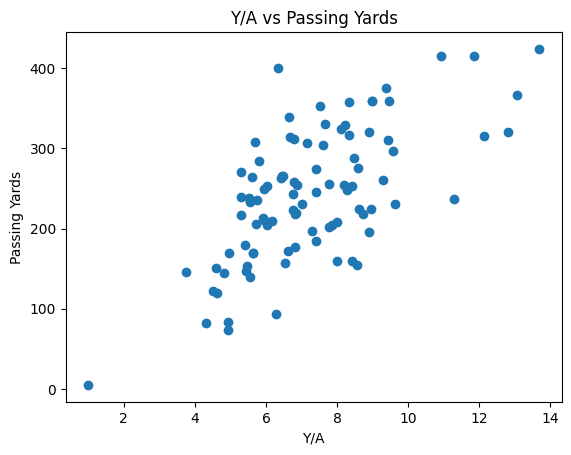

In [112]:
features = features.drop(columns='Yds')
target = df['Yds']

print(f'Shape of Features: {features.shape}\nShape of Target: {target.shape}')

for feature in features:
    plt.scatter(x=df[feature], y=target)
    plt.title(f'{feature} vs Passing Yards')
    plt.xlabel(feature)
    plt.ylabel('Passing Yards')
    plt.show()

<Axes: >

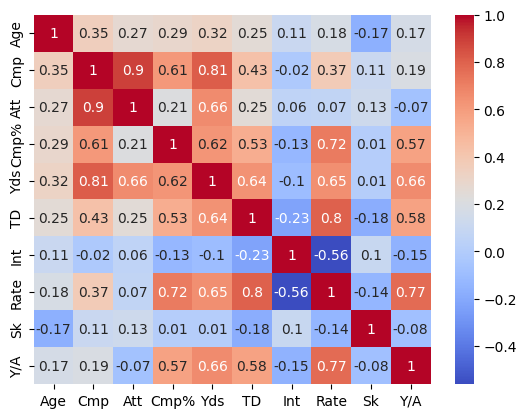

In [113]:
import seaborn as sns

cor_matrix = df[nummerical_cols].corr()
sns.heatmap(cor_matrix, annot=cor_matrix.round(2), cmap='coolwarm',)

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=69)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )

(75, 9) (75,) (19, 9) (19,)


In [115]:
from sklearn.linear_model import Lasso

reg = Lasso() # Model using lasso regression
reg.fit(X_train,y_train) # Fit the model with our training data
pred = reg.predict(X_test) # Calc predictions

# Create lists for predicted, actual, and difference values
dif = []
table_data = []

for i in range(len(pred)):
    predicted = pred[i]
    actual = y_test.values[i]
    difference = actual - predicted
    dif.append(difference)

    # Append each row as a dictionary
    table_data.append({"Predicted": predicted, "Actual": actual, "Difference": difference})

# Convert the list of dictionaries into a pandas DataFrame
test_data = pd.DataFrame(table_data)
test_stats = test_data.describe(percentiles=[0.25,.5,.75])
# Display the DataFrame
print(test_data)
print(test_stats)



    Predicted  Actual  Difference
0      403.77  400.00       -3.77
1      142.38  139.00       -3.38
2      277.83  264.00      -13.83
3      294.48  304.00        9.52
4      212.42  210.00       -2.42
5      341.34  320.00      -21.34
6      211.12  217.00        5.88
7      247.61  253.00        5.39
8      193.79  206.00       12.21
9      211.12  208.00       -3.12
10     283.85  288.00        4.15
11     305.58  311.00        5.42
12     270.36  265.00       -5.36
13     309.65  330.00       20.35
14     131.38  122.00       -9.38
15     350.75  358.00        7.25
16     178.32  177.00       -1.32
17      83.51   84.00        0.49
18     313.04  314.00        0.96
       Predicted  Actual  Difference
count      19.00   19.00       19.00
mean      250.65  251.05        0.41
std        82.72   83.68        9.49
min        83.51   84.00      -21.34
25%       202.45  207.00       -3.58
50%       270.36  264.00        0.49
75%       307.61  312.50        5.65
max       403.77  400.00

In [116]:
# QB AVG STATS THIS SEASON: https://www.pro-football-reference.com/players/A/AlleJo02/gamelog/2024/

games_started = 9

qb_age = 28.185 # Nov 3rd 2024
qb_cmp = (168)/games_started
qb_att = (262)/games_started
qb_yds = (2001)/games_started
qb_TD = (17)/games_started
qb_int = (2)/games_started
qb_rate = 105.8
qb_sk = 11/games_started

print(qb_age, qb_att, qb_cmp, qb_yds, qb_TD, qb_int, qb_rate, qb_sk)

28.185 29.11111111111111 18.666666666666668 222.33333333333334 1.8888888888888888 0.2222222222222222 105.8 1.2222222222222223


In [117]:
# Defense AVG STATS THIS SEASON: https://www.pro-football-reference.com/teams/clt/2024.htm#all_defense
games_played =  9

pass_att_allowed = (291)/games_played
pass_cmp_allowed = (204)/games_played
passYds_allowed = (2104)/games_played
passTD_allowed = (14)/games_played
def_int = (6)/games_played
def_sks = (20)/games_played

print(pass_att_allowed, pass_cmp_allowed, passYds_allowed, passTD_allowed, def_int, def_sks)
print(passYds_allowed/pass_att_allowed)

32.333333333333336 22.666666666666668 233.77777777777777 1.5555555555555556 0.6666666666666666 2.2222222222222223
7.230240549828178


In [118]:
# Normalizing stats
att = (pass_att_allowed/qb_att) * qb_att
cmp = (pass_cmp_allowed/qb_cmp) * qb_cmp
cmpPer = (cmp/att) * 100
td = (passTD_allowed/qb_TD) * qb_TD
ints = (def_int/qb_int) * qb_int
sacks = (def_sks/qb_sk) * qb_sk
ya = ((passYds_allowed/qb_yds) * qb_yds) / att

input_stats = [qb_age, cmp, att, cmpPer, td, ints, qb_rate, sacks, ya]

In [119]:
nummerical_cols.remove('Yds')
test = pd.DataFrame([input_stats], columns=nummerical_cols)

print(test)

    Age   Cmp   Att  Cmp%   TD  Int   Rate   Sk  Y/A
0 28.18 22.67 32.33 70.10 1.56 0.67 105.80 2.22 7.23


In [120]:
predict = reg.predict(test)
pass_yards = predict[0]
print(f'This Model predicts QB will pass for {pass_yards:.2f} yards vs DEF')

This Model predicts QB will pass for 240.29 yards vs DEF


In [122]:


print(f'QB AVG Pass Yards 2024: {qb_yds:.2f}\nDefense AVG Passing Yards Allowed in 2024: {passYds_allowed:.2f}\nPredicted Passing Yards: {pass_yards:.2f}')


QB AVG Pass Yards 2024: 222.33
Defense AVG Passing Yards Allowed in 2024: 233.78
Predicted Passing Yards: 240.29
